# Sentiment Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### 1. Loading the dataset

In [2]:
testdf = pd.read_csv("test.csv")
traindf = pd.read_csv("train.csv")
traindf.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [3]:
print(traindf.sentiment.value_counts())

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64


In [4]:
# check if there are any NaN values for training data
traindf[traindf.isna().any(axis=1)]

textID text selected_text sentiment
314  fdb77c3752  NaN           NaN   neutral

In [5]:
# check if there are any NaN values for test data
testdf[testdf.isna().any(axis=1)]

Empty DataFrame
Columns: [textID, text, sentiment]
Index: []

In [6]:
traindf = traindf.dropna()
# check again if there are any NaN values
traindf[traindf.isna().any(axis=1)]

Empty DataFrame
Columns: [textID, text, selected_text, sentiment]
Index: []

In [7]:
import re
# Remove mentions in tweets
def clean_text(row, options):

    if options['remove_url']:
        row = re.sub("http\S+|www.\S+","", row)

    if options['remove_mentions']:
        row = re.sub("@[A-Za-z0-9]+","", row)

    return row

clean_config = {
    'remove_url': True,
    'remove_mentions': True,
    }


In [8]:
# clean text
traindf['text'] = traindf['text'].apply(clean_text, args=(clean_config,))
testdf['text'] = testdf['text'].apply(clean_text, args=(clean_config,))

In [9]:
X = traindf.text
y = traindf.sentiment
print(X.shape)
print(y.shape)

(27480,)
(27480,)


In [10]:
X_train = X
X_test = testdf.text
y_train = y
y_test = testdf.sentiment

In [11]:
print(X_train.shape)
print(X_test.shape)

(27480,)
(3534,)


### 2. Data Tokenization

In [12]:
vect = CountVectorizer()

In [13]:
X_train_dtm = vect.fit_transform(X_train)

In [14]:
X_test_dtm = vect.transform(X_test)

In [15]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(27480, 25100)
(3534, 25100)


In [16]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
vect.get_feature_names()

['00',
 '000',
 '000th',
 '00am',
 '00pm',
 '01',
 '02',
 '024',
 '03',
 '04',
 '05',
 '06',
 '060',
 '0600',
 '06am',
 '07',
 '07am',
 '08',
 '09',
 '0_o',
 '0f',
 '0ghz',
 '0k',
 '0n',
 '0rpm',
 '0ut',
 '10',
 '100',
 '1000',
 '10000000000',
 '100000000000000000000000000000000000',
 '1000th',
 '1000x',
 '100msg',
 '100th',
 '100x',
 '101',
 '1017',
 '102',
 '103',
 '1030',
 '103f',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '1095',
 '10am',
 '10days',
 '10k',
 '10m',
 '10mins',
 '10mm',
 '10p',
 '10pm',
 '10th',
 '10ty',
 '10yr',
 '11',
 '110',
 '1100',
 '1115',
 '1130',
 '1155hours',
 '116',
 '117th',
 '11am',
 '11e',
 '11pm',
 '11th',
 '12',
 '120',
 '121908inlove',
 '123',
 '128',
 '12am',
 '12hr',
 '12k',
 '12lbs',
 '12p',
 '12seconds',
 '12st',
 '12th',
 '12yr',
 '13',
 '130',
 '1300',
 '131',
 '1313',
 '132',
 '13341015518',
 '135',
 '138',
 '1386am',
 '13gigs',
 '13th',
 '14',
 '140',
 '143',
 '144',
 '145',
 '147',
 '14m',
 '14mph',
 '14th',
 '14yr',
 '15',
 '150',
 '15

### 3. Comparing results using different approaches and methods

Techniques 
1. Naive Bayes
2. Logistic Regression
3. VADER

In [18]:
def tokenize_NB(X_train, y_train, X_test, y_test, vect):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Naive Bayes')
    print('Features: ', X_train_dtm.shape[1])
    
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    # print the accuracy of its predictions
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('F1 Score: ', metrics.f1_score(y_test, y_pred_class, average="weighted"))
    
def tokenize_Logistic(X_train, y_train, X_test, y_test, vect):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('\nLogistic Regression')
    print('Features: ', X_train_dtm.shape[1])
    
    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train_dtm, y_train)
    y_pred_class = lr.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, lr.predict(X_train_dtm)))
    # print the accuracy of its predictions
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('F1 Score: ', metrics.f1_score(y_test, y_pred_class, average="weighted"))
    
def tokenize_features(X_train, y_train, X_test, y_test, vect):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    arr = []
    arr.append(metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    # print the accuracy of its predictions
    arr.append(metrics.accuracy_score(y_test, y_pred_class))
    return arr

def tokenize_features_lr(X_train, y_train, X_test, y_test, vect):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # use Logistic Regression to predict the star rating
    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train_dtm, y_train)
    y_pred_class = lr.predict(X_test_dtm)
    
    arr = []
    arr.append(metrics.accuracy_score(y_train, lr.predict(X_train_dtm)))
    # print the accuracy of its predictions
    arr.append(metrics.accuracy_score(y_test, y_pred_class))
    return arr

#### 1. Default Parameters

In [19]:
vect = CountVectorizer()

# NB
tokenize_NB(X_train, y_train, X_test, y_test, vect)

# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)

Naive Bayes
Features:  25100
Training Accuracy:  0.8267467248908297
Test Accuracy:  0.6550650820599887
F1 Score:  0.655919841042117

Logistic Regression
Features:  25100
Training Accuracy:  0.8723071324599709
Test Accuracy:  0.698641765704584
F1 Score:  0.6994583659295424


#### 2. N-Grams

In [20]:
vect = CountVectorizer(ngram_range=(1, 4))

# NB
tokenize_NB(X_train, y_train, X_test, y_test, vect)

# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)

Naive Bayes
Features:  644002
Training Accuracy:  0.9898835516739447
Test Accuracy:  0.6400679117147708
F1 Score:  0.6383222573478006

Logistic Regression
Features:  644002
Training Accuracy:  0.9955604075691412
Test Accuracy:  0.7040181097906055
F1 Score:  0.7048848189867093


#### 3. Removing Frequent words

Not removing infrequent words as there are other languages in the dataset so those words of languages that are used in the minority might be written off.

In [21]:
vect = CountVectorizer(stop_words='english')

# NB
tokenize_NB(X_train, y_train, X_test, y_test, vect)

# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)

Naive Bayes
Features:  24811
Training Accuracy:  0.8359898107714702
Test Accuracy:  0.6544991511035654
F1 Score:  0.6551227383686867

Logistic Regression
Features:  24811
Training Accuracy:  0.8642285298398835
Test Accuracy:  0.6966610073571025
F1 Score:  0.6972264731414753


#### 4. Set lowercasse to False 

Same accuracy as default so does not matter

In [22]:
vect = CountVectorizer(lowercase=False)
# NB
tokenize_NB(X_train, y_train, X_test, y_test, vect)

# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)

Naive Bayes
Features:  31449
Training Accuracy:  0.8429767103347889
Test Accuracy:  0.6414827391058291
F1 Score:  0.6425527585698655

Logistic Regression
Features:  31449
Training Accuracy:  0.8877365356622998
Test Accuracy:  0.6898698358800226
F1 Score:  0.6908252280778051


#### 5. Ignore words that appear in 50% of documents

In [23]:
vect = CountVectorizer(max_df=0.5)
tokenize_NB(X_train, y_train, X_test, y_test, vect)

# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)

Naive Bayes
Features:  25100
Training Accuracy:  0.8267467248908297
Test Accuracy:  0.6550650820599887
F1 Score:  0.655919841042117

Logistic Regression
Features:  25100
Training Accuracy:  0.8723071324599709
Test Accuracy:  0.698641765704584
F1 Score:  0.6994583659295424


#### 6. Max features restriction

In [49]:
# train_acc, test_acc = [], []

# for i in range(2000,X_train_dtm.shape[1],2000):
#     vect = CountVectorizer(max_features=i)

#     #using NB
#     result = tokenize_features(X_train, y_train, X_test, y_test, vect)
#     train_acc.append(result[0])
#     test_acc.append(result[1])

In [50]:
# index_arr = list(range(2000,X_train_dtm.shape[1],2000))
# df_maxfeatures = pd.DataFrame({'train': train_acc, 'test': test_acc}, columns=['train', 'test'], index=index_arr)
# df_maxfeatures

train      test
2000   0.710844  0.674307
4000   0.736499  0.672043
6000   0.753675  0.665252
8000   0.767831  0.663837
10000  0.779185  0.659875
12000  0.786572  0.659310
14000  0.794214  0.661573
16000  0.801674  0.660441
18000  0.808042  0.660724
20000  0.813719  0.659593
22000  0.818777  0.657895
24000  0.823799  0.655065
26000  0.828530  0.656763

In [51]:
# df_maxfeatures.to_csv("maxfeatures_nb_data.csv", index=False)

In [24]:
df_maxfeatures = pd.read_csv("maxfeatures_nb_data.csv")
df_maxfeatures.head()

train      test
0  0.710844  0.674307
1  0.736499  0.672043
2  0.753675  0.665252
3  0.767831  0.663837
4  0.779185  0.659875

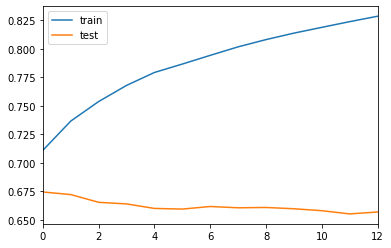

In [25]:
lines = df_maxfeatures.plot.line()

In [57]:
# train_acc, test_acc = [], []

# for i in range(2000,X_train_dtm.shape[1],2000):
#     vect = CountVectorizer(max_features=i)

#     #using Logistic Regression
#     result = tokenize_features_lr(X_train, y_train, X_test, y_test, vect)
#     train_acc.append(result[0])
#     test_acc.append(result[1])

In [58]:
# index_arr = list(range(2000,X_train_dtm.shape[1],2000))
# df_maxfeatures = pd.DataFrame({'train': train_acc, 'test': test_acc}, columns=['train', 'test'], index=index_arr)
# df_maxfeatures

train      test
2000   0.755531  0.709111
4000   0.789192  0.709394
6000   0.810590  0.704301
8000   0.825509  0.704584
10000  0.835335  0.703169
12000  0.841739  0.703169
14000  0.846798  0.700905
16000  0.851638  0.698642
18000  0.856878  0.700623
20000  0.861426  0.698925
22000  0.865902  0.699208
24000  0.869432  0.697793
26000  0.874272  0.699208

In [59]:
# df_maxfeatures.to_csv("maxfeatures_lr_data.csv", index=False)

In [26]:
df_maxfeatures = pd.read_csv("maxfeatures_lr_data.csv")
df_maxfeatures

train      test
0   0.755531  0.709111
1   0.789192  0.709394
2   0.810590  0.704301
3   0.825509  0.704584
4   0.835335  0.703169
5   0.841739  0.703169
6   0.846798  0.700905
7   0.851638  0.698642
8   0.856878  0.700623
9   0.861426  0.698925
10  0.865902  0.699208
11  0.869432  0.697793
12  0.874272  0.699208

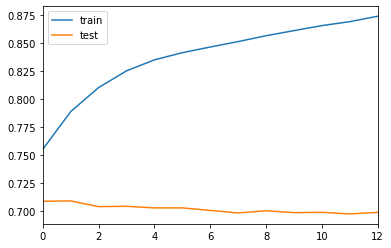

In [27]:
lines = df_maxfeatures.plot.line()

#### 7. Minimum Features Restriction

In [28]:
train_acc, test_acc = [], []

for i in range(1,10):
    # only keep terms that appear in at least i documents
    #using NB
    vect = CountVectorizer(min_df=i)

    result = tokenize_features(X_train, y_train, X_test, y_test, vect)
    train_acc.append(result[0])
    test_acc.append(result[1])

In [29]:
index_arr = list(range(1,10))
df_minfeatures = pd.DataFrame({'train': train_acc, 'test': test_acc}, columns=['train', 'test'], index=index_arr)
df_minfeatures

train      test
1  0.826747  0.655065
2  0.781259  0.660724
3  0.760844  0.666101
4  0.749927  0.668364
5  0.740866  0.670628
6  0.734534  0.673741
7  0.729876  0.673175
8  0.725728  0.673458
9  0.723217  0.674873

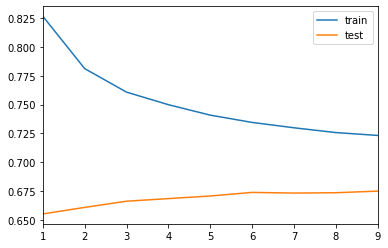

In [30]:
lines = df_minfeatures.plot.line()

In [31]:
train_acc, test_acc = [], []

for i in range(1,10):
    # only keep terms that appear in at least i documents
    #using Logistic Regression
    vect = CountVectorizer(min_df=i)

    result = tokenize_features_lr(X_train, y_train, X_test, y_test, vect)
    train_acc.append(result[0])
    test_acc.append(result[1])

In [32]:
index_arr = list(range(1,10))
df_minfeatures = pd.DataFrame({'train': train_acc, 'test': test_acc}, columns=['train', 'test'], index=index_arr)
df_minfeatures

train      test
1  0.872307  0.698642
2  0.835153  0.698925
3  0.818013  0.701471
4  0.805277  0.705999
5  0.793705  0.704584
6  0.786718  0.705433
7  0.780822  0.707697
8  0.775546  0.707697
9  0.771325  0.708829

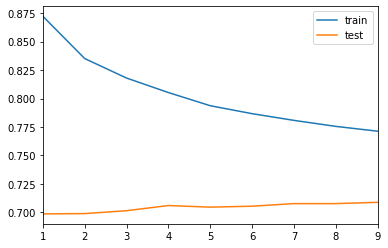

In [33]:
lines = df_minfeatures.plot.line()

In [75]:
# p = Pipeline([
#     ('vect', CountVectorizer(lowercase=False)),
#     ('clf', MultinomialNB())])

# maxf = [None] + list(range(2000,12000,2000))

# params = [{'vect__max_features':maxf,
#            'vect__stop_words':["english", None],
#            'vect__min_df':list(range(1,10)),
#            'vect__max_df':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#            'vect__ngram_range':[(1,1), (1,2), (1,3), (1,4), (1,5)]}]
# g = GridSearchCV(p, param_grid=params,scoring="accuracy",verbose=10)
# g.fit(X_train, y_train)
# g.best_estimator_

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.636, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.641, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.637, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.641, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.639, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.641, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.630, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.7s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.635, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.5s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.632, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.2s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.633, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.630, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.630, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.629, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.633, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.632, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.633, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.641, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.642, total=   2.1s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.642, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.629, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.638, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.633, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.636, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.646, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.2s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.1s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.7s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.641, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.641, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.645, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.647, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   2.1s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.633, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.641, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.632, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   4.2s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   3.2s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   3.0s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.641, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   3.3s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.642, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.652, total=   0.3s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.643, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.642, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.635, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.636, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.635, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.642, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.642, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.642, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__n

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.641, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_rang

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.619, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.621, total=   2.6s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.616, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.627, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.632, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   3.0s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   3.1s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   3.1s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   3.1s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   3.1s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.657, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.633, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.629, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.629, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.629, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.628, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.4s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   2.1s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   3.1s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   3.0s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.3s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   1.1s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.634, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.642, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.642, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.641, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   3.0s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.639, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.639, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.641, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.645, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.655, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.638, total=   1.1s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.646, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   1.1s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.632, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   3.1s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   3.0s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   2.1s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   3.4s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__n

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.641, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.637, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.639, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.639, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.643, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.645, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.635, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.636, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.641, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.627, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.628, total=   2.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.636, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.628, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.629, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.631, total=   3.0s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.631, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.3s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.3s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.633, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.3s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.634, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.634, total=   1.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.642, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.638, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__n

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.3s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.3s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_rang

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__n

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_rang

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__n

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.634, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.630, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.621, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.624, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.628, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.629, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.631, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.633, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   3.0s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.9s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.638, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.632, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   1.0s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.633, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.627, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.629, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.646, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.3s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.646, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.9s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.652, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.643, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.635, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.641, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.631, total=   2.3s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.633, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.633, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.9s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   1.0s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_rang

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.636, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.638, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.633, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__n

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_rang

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__n

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_rang

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__n

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.631, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.630, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.618, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.617, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.627, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.630, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   1.0s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   1.0s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   1.0s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.628, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.630, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.633, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.628, total=   2.4s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.628, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.627, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.627, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.636, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.635, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.640, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.643, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.645, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.636, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.636, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.641, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_rang

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.633, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__n

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_rang

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__n

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.652, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_rang

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.639, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.630, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.635, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.632, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.641, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.633, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.635, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.631, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.627, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.627, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.631, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.3s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.643, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.643, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.638, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.631, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.636, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.641, total=   0.3s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.633, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.3s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.637, total=   0.3s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.640, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ng

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.639, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.643, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_rang

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.636, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__n

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_rang

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.646, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__n

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_rang

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.621, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.627, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.632, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.630, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.627, total=   2.3s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.633, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.652, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.643, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.632, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.632, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   1.0s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.629, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.629, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.6s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.6s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.646, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.634, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   1.0s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.634, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.3s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.3s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   1.0s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   1.0s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.635, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.642, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__n

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_rang

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.633, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__n

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_rang

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.3s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__n

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_rang

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.636, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.615, total=   2.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.638, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.639, total=   0.3s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.646, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.629, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.636, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.636, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.646, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.628, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.628, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.631, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.627, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.9s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.628, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.9s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.3s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.655, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.643, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.641, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.635, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.641, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.635, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   3.0s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.9s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.9s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   3.0s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.652, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.636, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.639, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.635, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.635, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.631, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.632, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__n

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_rang

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.3s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__n

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_rang

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.631, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.629, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.627, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.629, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.633, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.632, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.641, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.628, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.636, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.632, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.637, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.632, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.646, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.633, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   3.0s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.652, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.2s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.646, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.632, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.634, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.3s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.642, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.3s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.652, total=   0.3s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.643, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.644, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.645, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.635, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.645, total=   0.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.636, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.638, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.641, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.635, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.647, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__n

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.641, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.631, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_rang

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.620, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.619, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.616, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.627, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.630, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.632, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.640, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.647, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.649, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.650, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.651, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.642, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.638, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.631, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2)

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.638, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.631, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.634, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.637, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.640, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.644, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.629, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3)

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.634, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.630, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.632, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.637, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.638, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.629, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4)

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.628, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.632, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.631, total=   2.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.639, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.7s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.3s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.643, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.648, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.649, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.653, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.656, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.640, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.648, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.635, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.636, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.644, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.643, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.634, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.642, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.642, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.635, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3)

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.638, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.640, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.644, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.645, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4)

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.637, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.640, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.647, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.633, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5)

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   3.0s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.632, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.639, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.635, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.639, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.641, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.642, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.646, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.647, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.648, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.637, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.654, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.639, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.644, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.645, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.646, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.647, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.642, total=   1.0s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.640, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.646, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.638, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.645, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.639, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.643, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.647, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.641, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.645, total=   1.1s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.631, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.639, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.636, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.632, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.637, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.634, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.639, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.642, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.640, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.643, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.636, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.638, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.635, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.639, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.634, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.637, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.638, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.643, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.644, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.645, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.634, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.638, total=   3.0s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.636, total=   2.7s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.637, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.639, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.646, total=   0.3s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.640, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.645, total=   0.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.644, total=   0.3s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.650, total=   0.3s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__n

[Parallel(n_jobs=1)]: Done 16200 out of 16200 | elapsed: 362.2min finished


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=False, max_df=0.1,
                                 max_features=None, min_df=7,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [76]:
# plr = Pipeline([
#     ('vect', CountVectorizer(lowercase=False)),
#     ('clf', LogisticRegression())])

# maxf = [None] + list(range(2000,12000,2000))

# params = [{'vect__max_features':maxf,
#            'vect__stop_words':["english", None],
#            'vect__min_df':list(range(1,10)),
#            'vect__max_df':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#            'vect__ngram_range':[(1,1), (1,2), (1,3), (1,4), (1,5)]}]
# glr = GridSearchCV(plr, param_grid=params,scoring="accuracy",verbose=10)
# glr.fit(X_train, y_train)
# glr.best_estimator_

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.679, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.682, total=   0.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.672, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.4s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.685, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.8s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.677, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.1s remaining:    0.0s


[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.675, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.681, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.675, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.673, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.1s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.671, total=   1.9s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   1.9s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.670, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.6s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.9s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.2s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.656, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.660, total=   3.0s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.655, total=   3.0s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.656, total=   3.0s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.672, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.679, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.659, total=   1.1s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.658, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.656, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.659, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.659, total=   2.4s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.659, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.2s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.2s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.1, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.660, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.670, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.667, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.667, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.683, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.6s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.671, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.8s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.670, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.660, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.7s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.2s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.2s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.670, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.1s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.682, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.670, total=   0.7s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.683, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   1.0s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.670, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.663, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.2s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.670, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.666, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.666, total=   1.8s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.4s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=8, vect__n

[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.5s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.5s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.6s
[CV] vect__max_df=0.1, vect__max_features=10000, vect__min_df=9, vect__ngram_rang

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.674, total=   4.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.678, total=   4.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.674, total=   4.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   2.6s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.9s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   2.1s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.673, total=   3.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.670, total=   3.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=None, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.679, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.662, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.669, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.678, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.657, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.657, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.656, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.655, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.655, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.656, total=   2.5s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.676, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.684, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   1.0s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.662, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.671, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.667, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.667, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.666, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.666, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.672, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.1s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.666, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.0s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.670, total=   2.2s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.1s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.2s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.5s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.669, total=   2.8s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.673, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.7s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.9s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.670, total=   3.4s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.3s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.2s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.4s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.6s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.2, vect__max_features=10000, vect__min_df=9, vect__n

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.6s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.6s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   1.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.2s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=None, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.660, total=   2.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.657, total=   2.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.656, total=   2.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.655, total=   2.6s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   1.8s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.8s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.9s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.9s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.658, total=   3.1s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.658, total=   3.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.660, total=   3.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.654, total=   3.1s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.655, total=   3.2s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.674, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.672, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.662, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   1.9s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.3s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.0s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.660, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.684, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.6s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.671, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.669, total=   1.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.3s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.3s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.3s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.3s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.3s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.676, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.670, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.683, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.670, total=   2.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.671, total=   2.1s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.3s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.2s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.6s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.669, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.3, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.679, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=3, vect__n

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=4, vect__ngram_rang

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=6, vect__n

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.684, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=7, vect__ngram_rang

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.2s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.3, vect__max_features=10000, vect__min_df=9, vect__n

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.683, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.676, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.678, total=   3.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.673, total=   2.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.676, total=   2.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.9s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.670, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   3.0s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.670, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.9s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.4, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.670, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.679, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.658, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.662, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.671, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.659, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.656, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.657, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.655, total=   2.0s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.0s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.661, total=   2.6s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.660, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.2s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.683, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.683, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.671, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.670, total=   3.3s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.4, vect__max_features=8000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.683, total=   1.0s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   1.0s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.673, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=1, vect__ngram_rang

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=3, vect__n

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.669, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=4, vect__ngram_rang

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.4s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.670, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.2s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.1s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=6, vect__n

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.684, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=7, vect__ngram_rang

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.9s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.6s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.4, vect__max_features=10000, vect__min_df=9, vect__n

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   2.6s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.677, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.672, total=   5.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.678, total=   6.1s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.672, total=   3.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.676, total=   3.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.6s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.676, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.684, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.657, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.678, total=   1.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.660, total=   2.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.657, total=   2.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.0s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   1.9s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.655, total=   2.1s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.656, total=   2.0s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.657, total=   2.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.659, total=   2.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.659, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.659, total=   2.6s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.656, total=   2.5s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.655, total=   2.5s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.8s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.8s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.658, total=   3.2s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.657, total=   3.2s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.660, total=   3.3s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.658, total=   3.2s
[CV] vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.654, total=   3.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.669, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.659, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   1.9s
[CV] vect__max_df=0.5, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.667, total=   2.0s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.683, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.669, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.4s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.3s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.3s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=6000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   1.0s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   1.0s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   1.0s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.673, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.2s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.5, vect__max_features=8000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.683, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.670, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=1, vect__ngram_rang

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   2.9s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.669, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.661, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=3, vect__n

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.9s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.8s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.6s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=4, vect__ngram_rang

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.4s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=7, vect__n

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=8, vect__ngram_rang

[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.5, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.685, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.677, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.684, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.675, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.674, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.670, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.669, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.684, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   3.0s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.655, total=   2.6s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   1.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.671, total=   1.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.3s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.657, total=   3.2s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.2s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.657, total=   3.2s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.656, total=   3.2s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.656, total=   3.2s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.674, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.672, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.679, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.679, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.659, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   1.9s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.660, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   3.5s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   3.6s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.6s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.661, total=   2.6s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.660, total=   2.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.3s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.3s
[CV] vect__max_df=0.6, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.3s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.684, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=6000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.671, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.667, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.671, total=   2.3s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.671, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.683, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.671, total=   2.9s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.671, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.8s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.9s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.4s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.6, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.3s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.686, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=1, vect__ng

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.6s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=2, vect__ngram_rang

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   1.0s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=4, vect__n

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.6s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=5, vect__ngram_rang

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.673, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.2s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=7, vect__n

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=8, vect__ngram_rang

[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.1s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.5s
[CV] vect__max_df=0.6, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.674, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.678, total=   2.3s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.677, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.684, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.672, total=   3.1s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.676, total=   3.2s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.9s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.673, total=   3.1s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   3.0s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.9s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.9s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.6s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.670, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.669, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.669, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.658, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.671, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.671, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.659, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.659, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.659, total=   2.0s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.654, total=   1.9s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.655, total=   2.0s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.660, total=   2.6s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.6s
[CV] vect__max_df=0.7, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.660, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.6s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   1.9s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.9s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.3s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.658, total=   3.3s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   1.0s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=4000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.685, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   1.0s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.683, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.0s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.2s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.666, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.684, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.9s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=6000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.671, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.676, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.684, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=1, vect__n

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.3s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.671, total=   1.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.3s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.671, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=2, vect__ngram_rang

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.671, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=4, vect__n

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.9s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.670, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=5, vect__ngram_rang

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.669, total=   2.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   3.0s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=7, vect__n

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=8, vect__ngram_rang

[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.5s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.7, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.3s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.679, total=   0.6s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.673, total=   5.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.679, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.6s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.673, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.0s
[CV] vect__max_df=0.8, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.1s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.656, total=   2.1s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.655, total=   1.9s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.654, total=   1.9s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.659, total=   2.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.657, total=   2.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.655, total=   2.9s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.656, total=   2.6s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   1.9s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   1.8s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.657, total=   3.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.655, total=   3.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.654, total=   3.2s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.669, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.683, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.2s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.2s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.0s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.0s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.659, total=   2.0s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.659, total=   2.0s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=4000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.671, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.671, total=   1.8s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.3s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.3s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.3s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   1.0s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.670, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.3s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.669, total=   2.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.2s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.669, total=   2.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.3s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.1s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.684, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.661, total=   2.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=1, vect__n

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.671, total=   1.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=2, vect__ngram_rang

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.4s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.6s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.676, total=   0.8s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.7s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=8, vect__n

[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.3s
[CV] vect__max_df=0.8, vect__max_features=10000, vect__min_df=9, vect__ngram_rang

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.679, total=   2.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.683, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.676, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.674, total=   2.3s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.3s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.669, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.1s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.669, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.667, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.6s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.5s
[CV] vect__max_df=0.9, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.659, total=   3.2s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.657, total=   3.2s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.654, total=   3.2s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.655, total=   3.2s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.672, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.669, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.679, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.660, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.659, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.654, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.654, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.660, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.6s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.9s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.660, total=   2.6s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.660, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.9s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.3s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.2s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.9, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.660, total=   3.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 2)

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.684, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 3)

[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.4s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.683, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   3.0s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.671, total=   3.0s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 4)

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   3.0s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   3.1s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.661, total=   3.0s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.9s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   3.2s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.9s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.8s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.9s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.7s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.7s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 5)

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.8s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.8s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.7s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.6s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.7s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.6s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.6s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=0.9, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 1)

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.682, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.672, total=   0.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.683, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   1.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.670, total=   0.9s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.671, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.5s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.2s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.669, total=   2.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.2s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.1s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.676, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.0s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.681, total=   1.4s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=8, vect__n

[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.675, total=   1.6s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.8s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=0.9, vect__max_features=10000, vect__min_df=9, vect__ngram_rang

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.674, total=   4.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.678, total=   4.6s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.675, total=   4.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   2.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=1, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.668, total=   3.1s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   2.0s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.6s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.673, total=   3.6s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=3, vect__ngram_range=(1, 5)

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.671, total=   3.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.685, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=7, vect__ngram_range=(1, 1)

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.673, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=8, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.671, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=None, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.679, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.671, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.659, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=1, vect__ngram_range=(1, 2)

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.661, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.658, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.673, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=2, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.655, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.679, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.669, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=3, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.678, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.657, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.658, total=   2.0s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=4, vect__ngram_range=(1, 3)

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.660, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.657, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.654, total=   1.9s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=5, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.655, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.674, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=6, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.679, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.659, total=   2.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=7, vect__ngram_range=(1, 4)

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.658, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.655, total=   2.6s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=8, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.655, total=   2.5s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.679, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.670, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=2000, vect__min_df=9, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=1, vect__ngram_range=(1, 5)

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.3s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.665, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=2, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.660, total=   3.3s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.675, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=3, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.661, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.684, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.676, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=5, vect__ngram_range=(1, 1)

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.679, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=6, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.675, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.676, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.684, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.682, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.663, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.668, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=8, vect__ngram_range=(1, 2)

[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.666, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.662, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.674, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=4000, vect__min_df=9, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.664, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.672, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.671, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=1, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.682, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.670, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=2, vect__ngram_range=(1, 3)

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.668, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=3, vect__ngram_range=(1, 4), v

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.0s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=4, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.680, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.672, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.663, total=   2.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=5, vect__ngram_range=(1, 4)

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   2.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.666, total=   2.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=6, vect__ngram_range=(1, 5), v

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.665, total=   2.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.676, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.684, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.673, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=7, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.662, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=8, vect__ngram_range=(1, 5)

[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=6000, vect__min_df=9, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.7s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.678, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 1), v

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=1, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.663, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.6s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.671, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=2, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.683, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.670, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.680, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.681, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=3, vect__ngram_range=(1, 1)

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.677, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.678, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.8s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.672, total=   1.0s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=4, vect__ngram_range=(1, 2), v

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.674, total=   0.7s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.675, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.680, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.673, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=5, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.681, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.674, total=   0.9s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.673, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=6, vect__ngram_range=(1, 2)

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.669, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.665, total=   1.4s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.676, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=7, vect__ngram_range=(1, 3), v

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.667, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.681, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=8, vect__ngram_ran

[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.680, total=   1.3s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=english, score=0.675, total=   1.2s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.663, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.665, total=   2.0s
[CV] vect__max_df=1.0, vect__max_features=8000, vect__min_df=9, vect__ngram_range=(1, 3)

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.664, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.669, total=   2.1s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.662, total=   2.3s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.671, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=1, vect__ngram_range=(

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 3), vect__stop_words=None, score=0.661, total=   2.2s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.673, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=2, vect__n

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.682, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=english, score=0.670, total=   1.6s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   3.1s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.669, total=   2.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=3, vect__ngram_rang

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.664, total=   3.1s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.670, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=4, vect__ngram_range=(

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 4), vect__stop_words=None, score=0.662, total=   2.9s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.675, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.680, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.672, total=   1.9s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=5, vect__n

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.681, total=   1.7s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=english, score=0.674, total=   1.8s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.666, total=   3.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.669, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=6, vect__ngram_rang

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.668, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=7, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.664, total=   3.4s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.677, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(

[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=8, vect__ngram_range=(1, 5), vect__stop_words=None, score=0.667, total=   3.3s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.676, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.682, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.673, total=   0.5s
[CV] vect__max_df=1.0, vect__max_features=10000, vect__min_df=9, vect__n

[Parallel(n_jobs=1)]: Done 16200 out of 16200 | elapsed: 447.2min finished


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=False, max_df=0.1,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                    

In [80]:
# g.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=False, max_df=0.1,
                                 max_features=None, min_df=7,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [81]:
# glr.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=False, max_df=0.1,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                    

In [34]:
vect = CountVectorizer(lowercase=False, max_features=None, min_df= 7, max_df= 0.1 )
# NB
tokenize_NB(X_train, y_train, X_test, y_test, vect)

Naive Bayes
Features:  3699
Training Accuracy:  0.7297307132459971
Test Accuracy:  0.6641199773627617
F1 Score:  0.6650726164917974


In [35]:
vect = CountVectorizer(lowercase=False, max_features=None, max_df= 0.1, min_df= 1, stop_words="english", ngram_range=(1,3))
# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)


Logistic Regression
Features:  297220
Training Accuracy:  0.9864992721979622
Test Accuracy:  0.691284663271081
F1 Score:  0.6916943589907472


In [57]:
vect = CountVectorizer(lowercase=False, max_features=4000, ngram_range=(1,3))
# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)


Logistic Regression
Features:  5000
Training Accuracy:  0.7964337700145561
Test Accuracy:  0.6754385964912281
F1 Score:  0.6762904874616475


In [64]:
vect = CountVectorizer(max_features=4000)
# Logistic
tokenize_Logistic(X_train, y_train, X_test, y_test, vect)

#best estimator


Logistic Regression
Features:  4000
Training Accuracy:  0.7887918486171761
Test Accuracy:  0.7054329371816639
F1 Score:  0.7060987054296851


In [46]:
# p.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary'])

### Manually tune the max features with best params 

In [58]:
train_acc, test_acc = [], []

for i in range(2000,X_train_dtm.shape[1],2000):
    vect = CountVectorizer(lowercase=False, max_features=i, ngram_range=(1,3))

    #using Logistic Regression
    result = tokenize_features_lr(X_train, y_train, X_test, y_test, vect)
    train_acc.append(result[0])
    test_acc.append(result[1])

In [86]:
index_arr = list(range(2000,X_train_dtm.shape[1],2000))
df_maxfeatures = pd.DataFrame({'train': train_acc, 'test': test_acc}, columns=['train', 'test'], index=index_arr)
df_maxfeatures

train      test
2000   0.727365  0.674873
4000   0.776164  0.672326
6000   0.810881  0.675439
8000   0.836827  0.672043
10000  0.856732  0.675156
12000  0.873399  0.673175
14000  0.886681  0.676287
16000  0.898108  0.676570
18000  0.907387  0.674873
20000  0.914047  0.674873
22000  0.921033  0.677702
24000  0.926783  0.682513

In [87]:
df_maxfeatures.to_csv("maxfeatures_manual_data.csv", index=False)

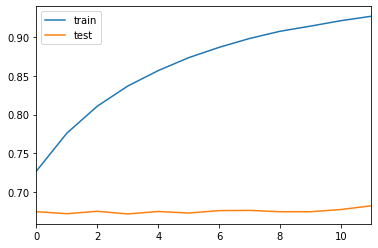

In [88]:
df_maxfeatures = pd.read_csv("maxfeatures_manual_data.csv")
lines = df_maxfeatures.plot.line()

#### VADER 

In [37]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/weixin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
sid = SentimentIntensityAnalyzer()

traindf['scores'] = traindf['text'].apply(lambda text: sid.polarity_scores(text))
traindf['compound']  = traindf['scores'].apply(lambda score_dict: score_dict['compound'])
traindf['comp_score'] = traindf['compound'].apply(lambda c: 1.0 if c > 0 else (0.0 if c == 0.0 else -1))

traindf.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  \
0  I`d have responded, if I were going   neutral   
1                             Sooo SAD  negative   
2                          bullying me  negative   
3                       leave me alone  negative   
4                        Sons of ****,  negative   

                                              scores  compound  comp_score  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000         0.0  
1  {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp...   -0.7437        -1.0  
2  {'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'comp...   -0.5994        -1.0  
3  {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...   -0.3595        -1.0  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000         0.0

In [46]:

scores = X_test.apply(lambda text: sid.polarity_scores(text))
compound  = scores.apply(lambda score_dict: score_dict['compound'])
comp_score = compound.apply(lambda c: "positive" if c > 0 else ("neutral" if c == 0.0 else "negative"))


In [42]:
metrics.accuracy_score(y_test, comp_score) #testing accuracy

0.6474250141482739

In [47]:
metrics.f1_score(y_test, comp_score, average="weighted")

0.6387445555096106

In [48]:
scores = X_train.apply(lambda text: sid.polarity_scores(text))
compound  = scores.apply(lambda score_dict: score_dict['compound'])
comp_score = compound.apply(lambda c: "positive" if c > 0 else ("neutral" if c == 0.0 else "negative"))

metrics.accuracy_score(y_train, comp_score) #training accuracy

0.630494905385735

In [50]:
metrics.f1_score(y_train, comp_score, average="weighted")

0.6217404812669971

### Apply to scraped data

In [75]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

Unnamed: 0                                                url  \
0           0  https://twitter.com/lundp/status/1547135712536...   
1           1  https://twitter.com/JayDCooke/status/154713564...   
2           2  https://twitter.com/Semhar/status/154713498935...   
3           3  https://twitter.com/JRizAnti_Tweets/status/154...   
4           4  https://twitter.com/laurengrumpy/status/154713...   

                        date  \
0  2012-01-04 23:59:24+00:00   
1  2012-01-04 23:59:22+00:00   
2  2012-01-04 23:59:07+00:00   
3  2012-01-04 23:59:04+00:00   
4  2012-01-04 23:58:50+00:00   

                                             content                  id  \
0  Trying new iSkin protector on MacBook Pro. And...  154713571253686272   
1                   I'm ready to get on the #MacBook  154713564031090689   
2  Syncing my entire life. All my personal & DAWN...  154713498935496704   
3  @MsSweetShay87 yup this year i asked 4 an audi...  154713487900291074   
4  @comptonasswoo MacBook! I'm considering buying...  154713429821751296   

                                  user outlinks tcooutlinks  replyCount  \
0            https://twitter.com/lundp       []          []           0   
1        https://twitter.com/JayDCooke       []          []           0   
2           https://twitter.com/Semhar       []          []           0   
3  https://twitter.com/JRizAnti_Tweets       []          []           2   
4     https://twitter.com/laurengrumpy       []          []           1   

   retweetCount  ...      conversationId  lang  \
0             0  ...  154713571253686272    en   
1             0  ...  154713564031090689    en   
2             0  ...  154713498935496704    en   
3             0  ...  154707375994060801    en   
4             0  ...  154713429821751296    en   

                                              source  \
0  <a href="http://itunes.apple.com/us/app/twitte...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com" rel="nofollow">Tw...   
3  <a href="http://twitter.com" rel="nofollow">Tw...   
4  <a href="http://www.cloudhopper.com/" rel="nof...   

                                           sourceUrl         sourceLabel  \
0  http://itunes.apple.com/us/app/twitter/id40978...     Twitter for Mac   
1                 http://twitter.com/download/iphone  Twitter for iPhone   
2                                 http://twitter.com  Twitter Web Client   
3                                 http://twitter.com  Twitter Web Client   
4                        http://www.cloudhopper.com/         Twitter SMS   

  media retweetedTweet  quotedTweet  \
0   NaN            NaN          NaN   
1   NaN            NaN          NaN   
2   NaN            NaN          NaN   
3   NaN            NaN          NaN   
4   NaN            NaN          NaN   

                                      mentionedUsers  device  
0                                                NaN     mac  
1                                                NaN     mac  
2                                                NaN     mac  
3                                                NaN     mac  
4  [User(username='Comptonasswoo', displayname='C...     mac  

[5 rows x 22 columns]

In [76]:
tweet_new = tweets
tweet_new['content'] = tweet_new['content'].apply(clean_text, args=(clean_config,))

In [77]:
tweet_new

Unnamed: 0                                                url  \
0               0  https://twitter.com/lundp/status/1547135712536...   
1               1  https://twitter.com/JayDCooke/status/154713564...   
2               2  https://twitter.com/Semhar/status/154713498935...   
3               3  https://twitter.com/JRizAnti_Tweets/status/154...   
4               4  https://twitter.com/laurengrumpy/status/154713...   
5               5  https://twitter.com/livthehen/status/154713285...   
6               6  https://twitter.com/doughboybeatz/status/15471...   
7               7  https://twitter.com/its_karinaaa/status/154713...   
8               8  https://twitter.com/Comptonasswoo/status/15471...   
9               9  https://twitter.com/doc_mbreezee/status/154713...   
10             10  https://twitter.com/LeiraSymone/status/1547130...   
11             11  https://twitter.com/punchdouble/status/1547129...   
12             12  https://twitter.com/jGorJes/status/15471281574...   
13             13  https://twitter.com/blake_andersson/status/154...   
14             14  https://twitter.com/trchdsn/status/15471262835...   
15             15  https://twitter.com/Sweeetly_Broken/status/154...   
16             16  https://twitter.com/camsoft2000/status/1547124...   
17             17  https://twitter.com/dparv/status/1547124920634...   
18             18  https://twitter.com/CvnonVision/status/1547123...   
19             19  https://twitter.com/DJAPACHE/status/1547123259...   
20             20  https://twitter.com/ndrwR/status/1547122817065...   
21             21  https://twitter.com/kimcherrell/status/1547122...   
22             22  https://twitter.com/awesomelikeiam/status/1547...   
23             23  https://twitter.com/IAMC_C/status/154712044568...   
24             24  https://twitter.com/mqaldas/status/15471198284...   
25             25  https://twitter.com/justcalledjack/status/1547...   
26             26  https://twitter.com/Tink_Styles/status/1547117...   
27             27  https://twitter.com/pappy1125/status/154711652...   
28             28  https://twitter.com/tackjhompson/status/154711...   
29             29  https://twitter.com/merritt182/status/15471156...   
...           ...                                                ...   
61410       61410  https://twitter.com/tme_michael/status/1080614...   
61411       61411  https://twitter.com/Qwamezzy/status/1080614510...   
61412       61412  https://twitter.com/StevenPGregory1/status/108...   
61413       61413  https://twitter.com/chashollywood/status/10806...   
61414       61414  https://twitter.com/luz_montenegro1/status/108...   
61415       61415  https://twitter.com/JamesMcKenna19/status/1080...   
61416       61416  https://twitter.com/yionejnr/status/1080614460...   
61417       61417  https://twitter.com/AimeeLynn28/status/1080614...   
61418       61418  https://twitter.com/anikauwu/status/1080614377...   
61419       61419  https://twitter.com/minecraftler205/status/108...   
61420       61420  https://twitter.com/leepfwd/status/10806143108...   
61421       61421  https://twitter.com/white_p0ny/status/10806142...   
61422       61422  https://twitter.com/LindsayFultz/status/108061...   
61423       61423  https://twitter.com/ECUProfessor/status/108061...   
61424       61424  https://twitter.com/stevem___/status/108061422...   
61425       61425  https://twitter.com/kaiannaqueen/status/108061...   
61426       61426  https://twitter.com/bfmttv/status/108061402640...   
61427       61427  https://twitter.com/frankiegpierce/status/1080...   
61428       61428  https://twitter.com/AndroidEducator/status/108...   
61429       61429  https://twitter.com/sarge_5150/status/10806139...   
61430       61430  https://twitter.com/sunmarwaha/status/10806139...   
61431       61431  https://twitter.com/softtfiya/status/108061390...   
61432       61432  https://twitter.com/urbanexploreMEL/status/108...   
61433       61433  https://twitter.com/belgotro

In [78]:
def predict_sentiment(X_train, y_train, X_test, vect):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # use Logistic Regression to predict the star rating
    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train_dtm, y_train)
    y_pred_class = lr.predict(X_test_dtm)

    return y_pred_class

In [79]:
X_test = tweet_new.content

In [80]:
vect = CountVectorizer(max_features=4000)

prec_sentiment = predict_sentiment(X_train, y_train, X_test, vect)

In [81]:
tweet_new['sentiment'] = prec_sentiment
tweet_new

Unnamed: 0                                                url  \
0               0  https://twitter.com/lundp/status/1547135712536...   
1               1  https://twitter.com/JayDCooke/status/154713564...   
2               2  https://twitter.com/Semhar/status/154713498935...   
3               3  https://twitter.com/JRizAnti_Tweets/status/154...   
4               4  https://twitter.com/laurengrumpy/status/154713...   
5               5  https://twitter.com/livthehen/status/154713285...   
6               6  https://twitter.com/doughboybeatz/status/15471...   
7               7  https://twitter.com/its_karinaaa/status/154713...   
8               8  https://twitter.com/Comptonasswoo/status/15471...   
9               9  https://twitter.com/doc_mbreezee/status/154713...   
10             10  https://twitter.com/LeiraSymone/status/1547130...   
11             11  https://twitter.com/punchdouble/status/1547129...   
12             12  https://twitter.com/jGorJes/status/15471281574...   
13             13  https://twitter.com/blake_andersson/status/154...   
14             14  https://twitter.com/trchdsn/status/15471262835...   
15             15  https://twitter.com/Sweeetly_Broken/status/154...   
16             16  https://twitter.com/camsoft2000/status/1547124...   
17             17  https://twitter.com/dparv/status/1547124920634...   
18             18  https://twitter.com/CvnonVision/status/1547123...   
19             19  https://twitter.com/DJAPACHE/status/1547123259...   
20             20  https://twitter.com/ndrwR/status/1547122817065...   
21             21  https://twitter.com/kimcherrell/status/1547122...   
22             22  https://twitter.com/awesomelikeiam/status/1547...   
23             23  https://twitter.com/IAMC_C/status/154712044568...   
24             24  https://twitter.com/mqaldas/status/15471198284...   
25             25  https://twitter.com/justcalledjack/status/1547...   
26             26  https://twitter.com/Tink_Styles/status/1547117...   
27             27  https://twitter.com/pappy1125/status/154711652...   
28             28  https://twitter.com/tackjhompson/status/154711...   
29             29  https://twitter.com/merritt182/status/15471156...   
...           ...                                                ...   
61410       61410  https://twitter.com/tme_michael/status/1080614...   
61411       61411  https://twitter.com/Qwamezzy/status/1080614510...   
61412       61412  https://twitter.com/StevenPGregory1/status/108...   
61413       61413  https://twitter.com/chashollywood/status/10806...   
61414       61414  https://twitter.com/luz_montenegro1/status/108...   
61415       61415  https://twitter.com/JamesMcKenna19/status/1080...   
61416       61416  https://twitter.com/yionejnr/status/1080614460...   
61417       61417  https://twitter.com/AimeeLynn28/status/1080614...   
61418       61418  https://twitter.com/anikauwu/status/1080614377...   
61419       61419  https://twitter.com/minecraftler205/status/108...   
61420       61420  https://twitter.com/leepfwd/status/10806143108...   
61421       61421  https://twitter.com/white_p0ny/status/10806142...   
61422       61422  https://twitter.com/LindsayFultz/status/108061...   
61423       61423  https://twitter.com/ECUProfessor/status/108061...   
61424       61424  https://twitter.com/stevem___/status/108061422...   
61425       61425  https://twitter.com/kaiannaqueen/status/108061...   
61426       61426  https://twitter.com/bfmttv/status/108061402640...   
61427       61427  https://twitter.com/frankiegpierce/status/1080...   
61428       61428  https://twitter.com/AndroidEducator/status/108...   
61429       61429  https://twitter.com/sarge_5150/status/10806139...   
61430       61430  https://twitter.com/sunmarwaha/status/10806139...   
61431       61431  https://twitter.com/softtfiya/status/108061390...   
61432       61432  https://twitter.com/urbanexploreMEL/status/108...   
61433       61433  https://twitter.com/belgotro

In [82]:
tweet_new.to_csv("tweets_sentiment.csv")

In [83]:
# using vader

sid = SentimentIntensityAnalyzer()

tweet_new['scores'] = tweet_new['content'].apply(lambda text: sid.polarity_scores(text))
tweet_new['compound']  = tweet_new['scores'].apply(lambda score_dict: score_dict['compound'])
tweet_new['sentiment'] = tweet_new['compound'].apply(lambda c: "positive" if c > 0 else ("neutral" if c == 0.0 else "negative"))

tweet_new.head()

Unnamed: 0                                                url  \
0           0  https://twitter.com/lundp/status/1547135712536...   
1           1  https://twitter.com/JayDCooke/status/154713564...   
2           2  https://twitter.com/Semhar/status/154713498935...   
3           3  https://twitter.com/JRizAnti_Tweets/status/154...   
4           4  https://twitter.com/laurengrumpy/status/154713...   

                        date  \
0  2012-01-04 23:59:24+00:00   
1  2012-01-04 23:59:22+00:00   
2  2012-01-04 23:59:07+00:00   
3  2012-01-04 23:59:04+00:00   
4  2012-01-04 23:58:50+00:00   

                                             content                  id  \
0  Trying new iSkin protector on MacBook Pro. And...  154713571253686272   
1                   I'm ready to get on the #MacBook  154713564031090689   
2  Syncing my entire life. All my personal & DAWN...  154713498935496704   
3   yup this year i asked 4 an audi, macbook n i ...  154713487900291074   
4   MacBook! I'm considering buying Civilization ...  154713429821751296   

                                  user outlinks tcooutlinks  replyCount  \
0            https://twitter.com/lundp       []          []           0   
1        https://twitter.com/JayDCooke       []          []           0   
2           https://twitter.com/Semhar       []          []           0   
3  https://twitter.com/JRizAnti_Tweets       []          []           2   
4     https://twitter.com/laurengrumpy       []          []           1   

   retweetCount  ...                                          sourceUrl  \
0             0  ...  http://itunes.apple.com/us/app/twitter/id40978...   
1             0  ...                 http://twitter.com/download/iphone   
2             0  ...                                 http://twitter.com   
3             0  ...                                 http://twitter.com   
4             0  ...                        http://www.cloudhopper.com/   

          sourceLabel  media retweetedTweet quotedTweet  \
0     Twitter for Mac    NaN            NaN         NaN   
1  Twitter for iPhone    NaN            NaN         NaN   
2  Twitter Web Client    NaN            NaN         NaN   
3  Twitter Web Client    NaN            NaN         NaN   
4         Twitter SMS    NaN            NaN         NaN   

                                      mentionedUsers device  sentiment  \
0                                                NaN    mac   negative   
1                                                NaN    mac   positive   
2                                                NaN    mac    neutral   
3                                                NaN    mac   positive   
4  [User(username='Comptonasswoo', displayname='C...    mac    neutral   

                                              scores  compound  
0  {'neg': 0.193, 'neu': 0.704, 'pos': 0.103, 'co...   -0.2878  
1  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...    0.3612  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
3  {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...    0.1280  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  

[5 rows x 25 columns]

In [84]:
tweet_new

Unnamed: 0                                                url  \
0               0  https://twitter.com/lundp/status/1547135712536...   
1               1  https://twitter.com/JayDCooke/status/154713564...   
2               2  https://twitter.com/Semhar/status/154713498935...   
3               3  https://twitter.com/JRizAnti_Tweets/status/154...   
4               4  https://twitter.com/laurengrumpy/status/154713...   
5               5  https://twitter.com/livthehen/status/154713285...   
6               6  https://twitter.com/doughboybeatz/status/15471...   
7               7  https://twitter.com/its_karinaaa/status/154713...   
8               8  https://twitter.com/Comptonasswoo/status/15471...   
9               9  https://twitter.com/doc_mbreezee/status/154713...   
10             10  https://twitter.com/LeiraSymone/status/1547130...   
11             11  https://twitter.com/punchdouble/status/1547129...   
12             12  https://twitter.com/jGorJes/status/15471281574...   
13             13  https://twitter.com/blake_andersson/status/154...   
14             14  https://twitter.com/trchdsn/status/15471262835...   
15             15  https://twitter.com/Sweeetly_Broken/status/154...   
16             16  https://twitter.com/camsoft2000/status/1547124...   
17             17  https://twitter.com/dparv/status/1547124920634...   
18             18  https://twitter.com/CvnonVision/status/1547123...   
19             19  https://twitter.com/DJAPACHE/status/1547123259...   
20             20  https://twitter.com/ndrwR/status/1547122817065...   
21             21  https://twitter.com/kimcherrell/status/1547122...   
22             22  https://twitter.com/awesomelikeiam/status/1547...   
23             23  https://twitter.com/IAMC_C/status/154712044568...   
24             24  https://twitter.com/mqaldas/status/15471198284...   
25             25  https://twitter.com/justcalledjack/status/1547...   
26             26  https://twitter.com/Tink_Styles/status/1547117...   
27             27  https://twitter.com/pappy1125/status/154711652...   
28             28  https://twitter.com/tackjhompson/status/154711...   
29             29  https://twitter.com/merritt182/status/15471156...   
...           ...                                                ...   
61410       61410  https://twitter.com/tme_michael/status/1080614...   
61411       61411  https://twitter.com/Qwamezzy/status/1080614510...   
61412       61412  https://twitter.com/StevenPGregory1/status/108...   
61413       61413  https://twitter.com/chashollywood/status/10806...   
61414       61414  https://twitter.com/luz_montenegro1/status/108...   
61415       61415  https://twitter.com/JamesMcKenna19/status/1080...   
61416       61416  https://twitter.com/yionejnr/status/1080614460...   
61417       61417  https://twitter.com/AimeeLynn28/status/1080614...   
61418       61418  https://twitter.com/anikauwu/status/1080614377...   
61419       61419  https://twitter.com/minecraftler205/status/108...   
61420       61420  https://twitter.com/leepfwd/status/10806143108...   
61421       61421  https://twitter.com/white_p0ny/status/10806142...   
61422       61422  https://twitter.com/LindsayFultz/status/108061...   
61423       61423  https://twitter.com/ECUProfessor/status/108061...   
61424       61424  https://twitter.com/stevem___/status/108061422...   
61425       61425  https://twitter.com/kaiannaqueen/status/108061...   
61426       61426  https://twitter.com/bfmttv/status/108061402640...   
61427       61427  https://twitter.com/frankiegpierce/status/1080...   
61428       61428  https://twitter.com/AndroidEducator/status/108...   
61429       61429  https://twitter.com/sarge_5150/status/10806139...   
61430       61430  https://twitter.com/sunmarwaha/status/10806139...   
61431       61431  https://twitter.com/softtfiya/status/108061390...   
61432       61432  https://twitter.com/urbanexploreMEL/status/108...   
61433       61433  https://twitter.com/belgotro

In [85]:
tweets.to_csv("tweets_sentiment_vader.csv")